###归一化、无数据增强功能###
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler

# Set random seed for PyTorch and NumPy
#seed = 64
#torch.manual_seed(seed)
#np.random.seed(seed)

# Load your data from mydata_petals.csv
data = pd.read_csv('mydata_petals.csv')

# Extract the last column (EAB) as the target variable
EAB = data.iloc[:, -1].values

# Extract the first 10 columns as input features
input = data.iloc[:, :-1].values

# Create MinMaxScaler objects for input and EAB
scaler_in = MinMaxScaler(feature_range=(-0.5, 0.5))
scaler_out = MinMaxScaler(feature_range=(-0.99, 0.99))

# Fit and transform input data, and store the transformation matrix ps_in
p_scaled = scaler_in.fit_transform(input)
p = torch.FloatTensor(p_scaled.T)
ps_in = scaler_in.scale_

# Fit and transform EAB data, and store the transformation matrix ts_out
t_scaled = scaler_out.fit_transform(EAB.reshape(-1, 1))
t = torch.FloatTensor(t_scaled)
ts_out = scaler_out.scale_

print("Scaled Data Shapes:")
print(p_scaled.shape)
print(t_scaled.shape)

# Define the ratio for training and testing data
train_ratio = 0.8  # 80% training data, 
test_ratio = 0.2   # 20% testing data

# Number of samples
n_samples = len(EAB)

# Create a random permutation of indices for shuffling
indices = np.random.permutation(n_samples)

# Calculate the sizes of the training and test sets
n_train = int(train_ratio * n_samples)
n_test = n_samples - n_train

# Use the shuffled indices to split the data into training and test sets
train_indices = indices[:n_train]
test_indices = indices[n_train:]

# Split the data into training and test sets based on the shuffled indices
X_train, y_train = p_scaled[train_indices], t_scaled[train_indices]
X_test, y_test = p_scaled[test_indices], t_scaled[test_indices]

print("Training Data Shapes:")
print(X_train.shape, y_train.shape)
print("Test Data Shapes:")
print(X_test.shape, y_test.shape)

# 打印训练数据前五行
print("First 5 rows of Training Data:")
print(X_train[:5])
print("First 5 rows of Training Target (y_train):")
print(y_train[:5])

print("Test Data Shapes:")
print(X_test.shape, y_test.shape)

# 打印测试数据前五行
print("First 5 rows of Test Data:")
print(X_test[:5])
print("First 5 rows of Test Target (y_test):")
print(y_test[:5])

In [1]:
###归一化、无数据增强功能###
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler

# Set random seed for PyTorch and NumPy
#seed = 64
#torch.manual_seed(seed)
#np.random.seed(seed)

# Load your data from mydata_petals.csv
data = pd.read_csv('mydata_petals.csv')

# Extract the last column (EAB) as the target variable
EAB = data.iloc[:, -1].values

# Extract the first 10 columns as input features
input = data.iloc[:, :-1].values

# Create MinMaxScaler objects for input and EAB
scaler_in = MinMaxScaler(feature_range=(-0.5, 0.5))
scaler_out = MinMaxScaler(feature_range=(-0.99, 0.99))

# Fit and transform input data, and store the transformation matrix ps_in
p_scaled = scaler_in.fit_transform(input)
p = torch.FloatTensor(p_scaled.T)
ps_in = scaler_in.scale_

# Fit and transform EAB data, and store the transformation matrix ts_out
t_scaled = scaler_out.fit_transform(EAB.reshape(-1, 1))
t = torch.FloatTensor(t_scaled)
ts_out = scaler_out.scale_

print("Scaled Data Shapes:")
print(p_scaled.shape)
print(t_scaled.shape)

# Define the ratio for training and testing data
train_ratio = 0.80  # 80% training data
test_ratio = 0.20   # 20% testing data

# Set the desired dataset size
dataset_size = 1600  # Adjust as needed, but it should be <= len(EAB)

# Number of samples
n_samples = min(len(EAB), dataset_size)

# Create a random permutation of indices for shuffling
indices = np.random.permutation(n_samples)

# Calculate the sizes of the training and test sets
n_train = int(train_ratio * n_samples)
n_test = n_samples - n_train

# Use the shuffled indices to split the data into training and test sets
train_indices = indices[:n_train]
test_indices = indices[n_train:]

# Split the data into training and test sets based on the shuffled indices
X_train, y_train = p_scaled[train_indices], t_scaled[train_indices]
X_test, y_test = p_scaled[test_indices], t_scaled[test_indices]

print("Training Data Shapes:")
print(X_train.shape, y_train.shape)
print("Test Data Shapes:")
print(X_test.shape, y_test.shape)

# Print the actual dataset size used for training and testing
print(f"Actual Dataset Size: {n_samples}")

# Print the first 5 rows of training and test data
print("First 5 rows of Training Data:")
print(X_train[:5])
print("First 5 rows of Training Target (y_train):")
print(y_train[:5])

print("Test Data Shapes:")
print(X_test.shape, y_test.shape)

print("First 5 rows of Test Data:")
print(X_test[:5])
print("First 5 rows of Test Target (y_test):")
print(y_test[:5])

Scaled Data Shapes:
(2000, 10)
(2000, 1)
Training Data Shapes:
(1280, 10) (1280, 1)
Test Data Shapes:
(320, 10) (320, 1)
Actual Dataset Size: 1600
First 5 rows of Training Data:
[[-0.16957392 -0.01578947  0.39907889  0.242      -0.17876026  0.12165118
   0.48016017  0.02367942 -0.13661202  0.41668183]
 [-0.11667143 -0.02581454 -0.46475771 -0.1495     -0.08942571  0.18981228
   0.04295595 -0.28251366 -0.4287796   0.08686556]
 [-0.03717472 -0.42042607  0.08029636  0.435      -0.42014585 -0.32668125
  -0.2022206  -0.25737705 -0.12513661  0.29588867]
 [ 0.23091221 -0.09448622  0.46836203 -0.0645     -0.16909754  0.44733005
  -0.41827448  0.07486339 -0.13515483  0.25768601]
 [ 0.11238204  0.31591479  0.05146175 -0.179       0.04457612 -0.14242756
   0.21751001  0.49362477 -0.15701275  0.01791886]]
First 5 rows of Training Target (y_train):
[[-0.35901099]
 [-0.33725275]
 [-0.31549451]
 [-0.03263736]
 [ 0.11967033]]
Test Data Shapes:
(320, 10) (320, 1)
First 5 rows of Test Data:
[[ 0.49442379

Training duration: 0.84 seconds


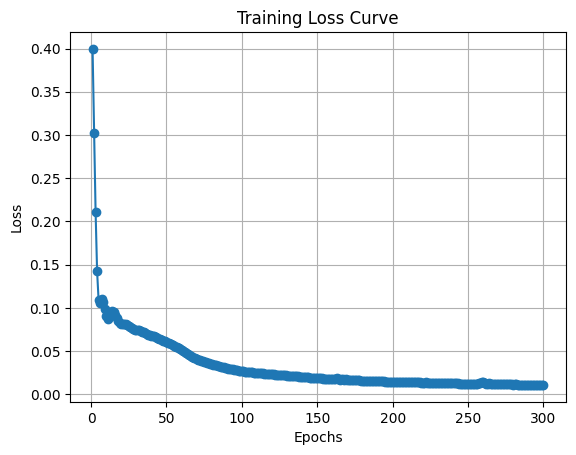

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import time

# Define your DNN architecture
class DNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dims):
        super(DNN, self).__init__()
        dims = [input_dim] + hidden_dims + [output_dim]
        self.layers = nn.ModuleList()
        for i in range(1, len(dims)):
            self.layers.append(nn.Linear(dims[i - 1], dims[i]))
            if i < len(dims) - 1:
                self.layers.append(nn.Tanh())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Define the fitness function for WOA
def fitness_function(weights, dnn, criterion, inputs, targets):
    # Apply weights to the DNN model
    start_idx = 0
    for param in dnn.parameters():
        param_size = param.numel()
        param.data = torch.FloatTensor(weights[start_idx:start_idx+param_size]).view(param.size())
        start_idx += param_size

    # Forward pass
    outputs = dnn(inputs)

    # Calculate the loss
    loss = criterion(outputs, targets)

    return loss.item()

# Define input dimension and hidden layer dimensions (adjust as needed)
input_dim = 10
hidden_dims = [14, 12, 8, 3]
output_dim = 1

# Add the following lines to define 'X_train' and 'y_train' based on your data
X_train = X_train
y_train = y_train

# Initialize the DNN
dnn = DNN(input_dim, output_dim, hidden_dims)
criterion = nn.MSELoss()

# Define the problem bounds for WOA
num_weights = sum(p.numel() for p in dnn.parameters())
lb = -1.0  # Lower bounds for weights
ub = 1.0  # Upper bounds for weights

# Initialize WOA parameters
population_size = 30
max_iterations = 20
a = 1.6  # A parameter in WOA  是控制 WOA 算法中螺旋结构和收缩压缩的参数。(0, 2) 
a_linear = -1 + np.linspace(0, 1, max_iterations) * (1 - (-1))  # Linearly decreasing parameter
C = 1.6 # Parameter for spiral updating
b = 1.0  # Parameter for spiral updating

# Record the start time
start_time = time.time()

# Initialize the population
positions = np.random.uniform(lb, ub, (population_size, num_weights))
fitness_values = np.zeros(population_size)
gbest_position = None
gbest_score = float('inf')

for iteration in range(max_iterations):
    for i in range(population_size):
        # Clip positions to be within bounds
        positions[i] = np.clip(positions[i], lb, ub)

        # Evaluate fitness
        fitness_values[i] = fitness_function(positions[i], dnn, criterion, torch.FloatTensor(X_train), torch.FloatTensor(y_train))

        # Update global best
        if fitness_values[i] < gbest_score:
            gbest_score = fitness_values[i]
            gbest_position = positions[i]

    # Update positions using WOA equations
    a_value = a_linear[iteration]
    for i in range(population_size):
        r1 = np.random.random(num_weights)
        r2 = np.random.random(num_weights)

        A = 2 * a_value * r1 - a_value  # Equation (3.6)
        C_position = 2 * r2  # Equation (3.7)

        distance_to_gbest = np.abs(C * gbest_position - positions[i])  # Equation (3.8)
        new_positions = gbest_position - A * distance_to_gbest  # Equation (3.9)

        # Spiral updating
        if np.random.random() < 0.4:
            new_positions = b * np.exp(C_position) * np.cos(2 * np.pi * C_position) * distance_to_gbest  # Equation (3.10)
        
        # Update positions
        positions[i] = new_positions

# Update the DNN with the global best position
start_idx = 0
for param in dnn.parameters():
    param_size = param.numel()
    param.data = torch.FloatTensor(gbest_position[start_idx:start_idx+param_size]).view(param.size())
    start_idx += param_size

# Training with optimized weights
num_epochs = 300
optimizer = optim.Adam(dnn.parameters(), lr=0.02)
losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = dnn(torch.FloatTensor(X_train))
    loss = criterion(outputs, torch.FloatTensor(y_train))
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Record the end time
end_time = time.time()

# Calculate and print the training duration
training_duration = end_time - start_time
print(f"Training duration: {training_duration:.2f} seconds")

# Plot the loss curve
plt.figure()
plt.plot(range(1, num_epochs+1), losses, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

R-squared (r_train) on training set: 0.886
Mean Absolute Error (MAE) on training set: 0.081
Mean Squared Error (MSE) on training set: 0.011
Root Mean Squared Error (RMSE) on training set: 0.104
R-squared (r_test) on test set: 0.803
Mean Absolute Error (MAE) on test set: 0.112
Mean Squared Error (MSE) on test set: 0.021
Root Mean Squared Error (RMSE) on test set: 0.145


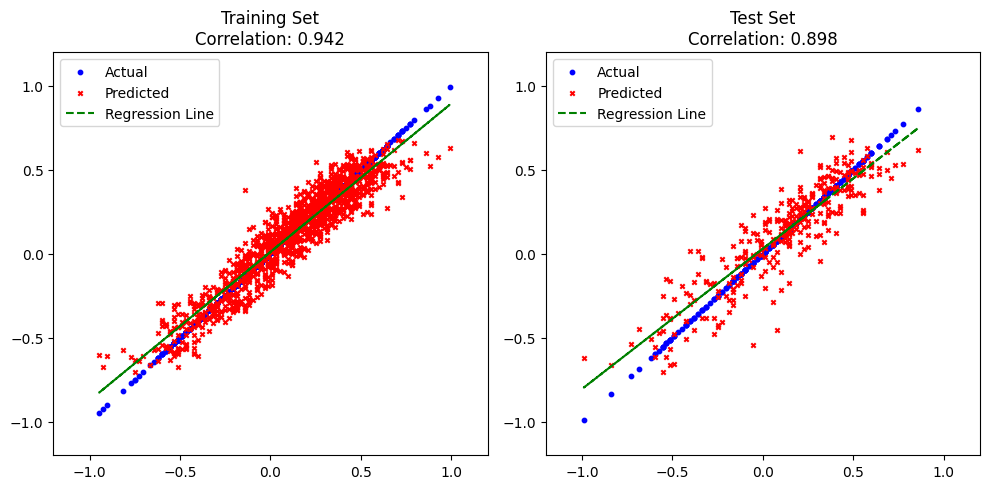

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
with torch.no_grad():
    predicted_train = dnn(torch.FloatTensor(X_train))
    train_true_values = y_train
    r_train = r2_score(train_true_values, predicted_train)
    mae_train = mean_absolute_error(train_true_values, predicted_train)   # MAE training set
    mse_train = mean_squared_error(train_true_values, predicted_train)    # MSE training set
    rmse_train = math.sqrt(mse_train)                               # RMSE training set

print(f"R-squared (r_train) on training set: {r_train:.3f}")
print(f"Mean Absolute Error (MAE) on training set: {mae_train:.3f}")
print(f"Mean Squared Error (MSE) on training set: {mse_train:.3f}")
print(f"Root Mean Squared Error (RMSE) on training set: {rmse_train:.3f}")

with torch.no_grad():              # Perform regression analysis on the test set (X_test, y_test)
    predicted_test = dnn(torch.FloatTensor(X_test))
    test_true_values = y_test
    r_test = r2_score(test_true_values, predicted_test)
    mae_test = mean_absolute_error(test_true_values, predicted_test)   #MAE test set
    mse_test = mean_squared_error(test_true_values, predicted_test)    # MSE test set
    rmse_test = math.sqrt(mse_test)                               #RMSE test set
    predicted_train = dnn(torch.FloatTensor(X_train))

print(f"R-squared (r_test) on test set: {r_test:.3f}")
print(f"Mean Absolute Error (MAE) on test set: {mae_test:.3f}")
print(f"Mean Squared Error (MSE) on test set: {mse_test:.3f}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse_test:.3f}")

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

actual_train = y_train
actual_test = y_test  # Replace 'y_test' with your test labels

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot of actual values and regression line for training set
axes[0].scatter(actual_train, actual_train, color='blue', label='Actual', marker='o', s=10)
axes[0].scatter(actual_train, predicted_train, color='red', label='Predicted', marker='x', s=10)
axes[0].set_xlim(-1.2, 1.2)
axes[0].set_ylim(-1.2, 1.2)
correlation_train = np.corrcoef(actual_train, predicted_train, rowvar=False)[0, 1]
axes[0].set_title(f'Training Set\nCorrelation: {correlation_train:.3f}')
regression_train = LinearRegression()
regression_train.fit(actual_train.reshape(-1, 1), predicted_train)
regression_line_train = regression_train.predict(actual_train.reshape(-1, 1))
axes[0].plot(actual_train, regression_line_train, color='green', linestyle='--', label='Regression Line')
axes[0].legend()

# Scatter plot of actual values and regression line for test set
axes[1].scatter(actual_test, actual_test, color='blue', label='Actual', marker='o', s=10)
axes[1].scatter(actual_test, predicted_test, color='red', label='Predicted', marker='x', s=10)
axes[1].set_xlim(-1.2, 1.2)
axes[1].set_ylim(-1.2, 1.2)
correlation_test = np.corrcoef(actual_test, predicted_test, rowvar=False)[0, 1]
axes[1].set_title(f'Test Set\nCorrelation: {correlation_test:.3f}')
regression_test = LinearRegression()
regression_test.fit(actual_test.reshape(-1, 1), predicted_test)
regression_line_test = regression_test.predict(actual_test.reshape(-1, 1))
axes[1].plot(actual_test, regression_line_test, color='green', linestyle='--', label='Regression Line')
axes[1].legend()
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import numpy as np
num_samples_to_plot = 150  # Set the number of samples you want to plot

# Plotting the actual and predicted values for the first 'num_samples_to_plot' samples
plt.plot(actual_test[:num_samples_to_plot], label='Actual', marker='o')
plt.plot(predicted_test[:num_samples_to_plot], label='Predicted', marker='x')

plt.title(f'Comparison of Actual and Predicted Values in Test Set (First {num_samples_to_plot} Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.show()

# Plotting the actual and predicted values for the first 'num_samples_to_plot' samples in the training set
plt.plot(actual_train[:num_samples_to_plot], label='Actual (Training)', marker='o')
plt.plot(predicted_train[:num_samples_to_plot], label='Predicted (Training)', marker='x')

plt.title(f'Comparison of Actual and Predicted Values in Training Set (First {num_samples_to_plot} Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.show()

# Perform predictions on the test set
with torch.no_grad():
    predicted_test_normalized = dnn(torch.FloatTensor(X_test))
# Inverse transform the predictions to the original scale
predicted_test_original = scaler_out.inverse_transform(predicted_test_normalized.reshape(-1, 1))

# Similarly, inverse transform the true values to the original scale
test_true_values_original = scaler_out.inverse_transform(y_test)

# Now you can calculate and print the evaluation metrics on the original scale
mae_test_original = mean_absolute_error(test_true_values_original, predicted_test_original)
mse_test_original = mean_squared_error(test_true_values_original, predicted_test_original)
rmse_test_original = np.sqrt(mse_test_original)
r2_test_original = r2_score(test_true_values_original, predicted_test_original)

print(f"Mean Absolute Error (MAE) on test set (original scale): {mae_test_original:.3f}")
print(f"Mean Squared Error (MSE) on test set (original scale): {mse_test_original:.3f}")
print(f"Root Mean Squared Error (RMSE) on test set (original scale): {rmse_test_original:.3f}")
print(f"R-squared (R2) on test set (original scale): {r2_test_original:.3f}")

# Perform predictions on the training set
with torch.no_grad():
    predicted_train_normalized = dnn(torch.FloatTensor(X_train))

# Inverse transform the predictions to the original scale
predicted_train_original = scaler_out.inverse_transform(predicted_train_normalized.reshape(-1, 1))

# Similarly, inverse transform the true values to the original scale
true_values_train_original = scaler_out.inverse_transform(y_train)

# Calculate and print the evaluation metrics on the training set
mae_train_original = mean_absolute_error(true_values_train_original, predicted_train_original)
mse_train_original = mean_squared_error(true_values_train_original, predicted_train_original)
rmse_train_original = np.sqrt(mse_train_original)
r2_train_original = r2_score(true_values_train_original, predicted_train_original)

print(f"Mean Absolute Error (MAE) on training set (original scale): {mae_train_original:.4f}")
print(f"Mean Squared Error (MSE) on training set (original scale): {mse_train_original:.4f}")
print(f"Root Mean Squared Error (RMSE) on training set (original scale): {rmse_train_original:.4f}")
print(f"R-squared (R2) on training set (original scale): {r2_train_original:.4f}")

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

actual_train = true_values_train_original
actual_test = test_true_values_original  # Replace 'y_test' with your test labels

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot of actual values and regression line for training set
axes[0].scatter(actual_train, actual_train, color='blue', label='Actual', marker='o', s=10)
axes[0].scatter(actual_train, predicted_train_original, color='red', label='Predicted', marker='x', s=10)
#axes[0].set_xlim(-1.2, 1.2)
#axes[0].set_ylim(-1.2, 1.2)
correlation_train = np.corrcoef(actual_train, predicted_train_original, rowvar=False)[0, 1]
axes[0].set_title(f'Training Set\nCorrelation: {correlation_train:.3f}')
regression_train = LinearRegression()
regression_train.fit(actual_train.reshape(-1, 1), predicted_train_original)
regression_line_train = regression_train.predict(actual_train.reshape(-1, 1))
axes[0].plot(actual_train, regression_line_train, color='green', linestyle='--', label='Regression Line')
axes[0].legend()

# Scatter plot of actual values and regression line for test set
axes[1].scatter(actual_test, actual_test, color='blue', label='Actual', marker='o', s=10)
axes[1].scatter(actual_test, predicted_test_original, color='red', label='Predicted', marker='x', s=10)
#axes[1].set_xlim(-1.2, 1.2)
#axes[1].set_ylim(-1.2, 1.2)
correlation_test = np.corrcoef(actual_test, predicted_test_original, rowvar=False)[0, 1]
axes[1].set_title(f'Test Set\nCorrelation: {correlation_test:.3f}')
regression_test = LinearRegression()
regression_test.fit(actual_test.reshape(-1, 1), predicted_test_original)
regression_line_test = regression_test.predict(actual_test.reshape(-1, 1))
axes[1].plot(actual_test, regression_line_test, color='green', linestyle='--', label='Regression Line')
axes[1].legend()
plt.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Your existing code for transforming predictions and plotting correlation

# Save data to a text file
np.savetxt('predicted_actual_train_data.txt', np.column_stack((actual_train, predicted_train_original)), delimiter=',', header='Actual Train, Predicted Train')
np.savetxt('predicted_actual_test_data.txt', np.column_stack((actual_test, predicted_test_original)), delimiter=',', header='Actual Test, Predicted Test')

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import numpy as np
num_samples_to_plot = 150  # Set the number of samples you want to plot

# Plotting the actual and predicted values for the first 'num_samples_to_plot' samples
plt.plot(actual_test[:num_samples_to_plot], label='Actual', marker='o')
plt.plot(predicted_test_original[:num_samples_to_plot], label='Predicted', marker='x')

plt.title(f'Comparison of Actual and Predicted Values in Test Set (First {num_samples_to_plot} Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.show()

# Plotting the actual and predicted values for the first 'num_samples_to_plot' samples in the training set
plt.plot(actual_train[:num_samples_to_plot], label='Actual (Training)', marker='o')
plt.plot(predicted_train_original[:num_samples_to_plot], label='Predicted (Training)', marker='x')

plt.title(f'Comparison of Actual and Predicted Values in Training Set (First {num_samples_to_plot} Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.show()

# Save the first 150 actual and predicted values for the test set to a txt file
np.savetxt('test_results.txt', np.column_stack((actual_test[:num_samples_to_plot], predicted_test_original[:num_samples_to_plot])),
           header='Actual Predicted', fmt='%f')

# Save the first 150 actual and predicted values for the training set to a txt file
np.savetxt('training_results.txt', np.column_stack((actual_train[:num_samples_to_plot], predicted_train_original[:num_samples_to_plot])),
           header='Actual Predicted', fmt='%f')
